# Stochastic Dominance

## Bibliographic Notes

* Coherent Risk Measures -- Meucci

* show that SSD is a linear program



## Utility

How does one rank preferences? Given a choice, $x$ or $y$, which should one choose? 

### Utility functions

Decisions like this, of course, depend on context. If it's a matter of choosing one piece of art over another then preferences will depend on a complex set of human factors which are beyond the scope of this book. Borrowing from microeconomics, there is assumed be a scalar valued *utility function* $u(\cdot)$ that assigns a relative preference to $x$ and $y$.  If $x$ is preferred to $y$ if and only if $u(y) > u(x)$. 

### Utility is non-decreasing

If, for example, $x$ and $y$ refer to the profits earned under otherwise identical circumstances, then most individuals would prefer the larger profit to smaller profit. Therefore one expects $u(\cdot)$ to be a non-decreasing function. In other words, $x \geq y$ implies $u(x) \geq u(y)$.

### Utility is convex (when money is involved)

Digging deeper, suppose an agent prefers $x$ to $y$. Then consider a linear combination of $x$ and $y$. One interpretation of rational economic behavior suggests a consumer would prefer any linear combination of  $\alpha x + (1 - \alpha)y$ to $y$. Then

$$ u(\alpha x + (1 - \alpha)y) \geq \alpha u(x) + (1-\alpha) u(y)$$

which shows utility with regard to economic preferences is a generally a convex function.

The assumption of convexity, while a foundation of basic microeconomics, and should be applied with care and due diligence in optimization studies. Convex utility is synonymous with "more is better" and the "first unit earned is more valuable than the next".  That is not necessarily always true or necessary for optimizing systems. The value of social networks, for example, may scale as a positive power of network size, a decidedly non-convex function.

## Utility and Randomness

Instead of specific assets $x$ and $y$, consider the utility of two assets, $X$ and $Y$, that have a random outcomes. What does utility say about economic preferences when randomness becomes a consideration?

Suppose, for example, $X$ and $Y$ generate realizations $(x_1, y_1), (x_2, y_2), \dots$ and $Y$. If every outcome of $X$ is greater than every outcome of $Y$, that is $x_j \geq y_j$  and $x_j > y_j$ for at least one $j$, then $X$ is said to dominate $Y$. 

This is a very strong condition known as state-wise dominance of $X$ over $Y$. This is a situation where one random outcome is great than or equal to another, every single time. 

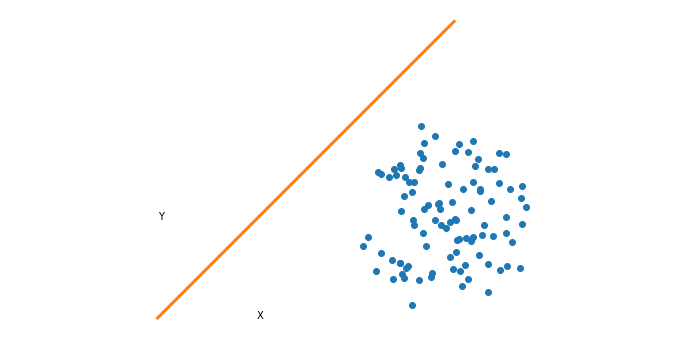

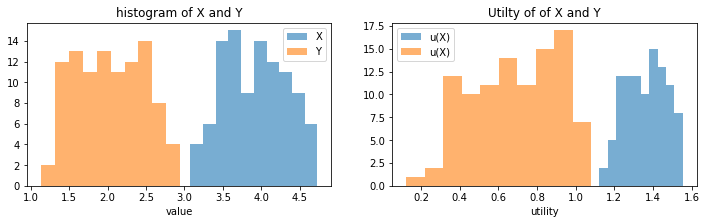

In [146]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.triangular(3, 4, 5, size=n)
y = np.random.triangular(1, 2, 3, size=n)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, 'o')
ax.axis('equal')
ax.plot([1, 4], [1, 4], lw=3)
ax.axis('off')
ax.text(2, 1, "X")
ax.text(1, 2, "Y")

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].hist(x, alpha=0.6, label='X')
ax[0].hist(y, alpha=0.6, label='Y')
ax[0].set_xlabel("value")
ax[0].set_title("histogram of X and Y")
ax[0].legend()

ax[1].hist(np.log(x), alpha=0.6, label='u(X)')
ax[1].hist(np.log(y), alpha=0.6, label='u(X)')
ax[1].set_xlabel("utility")
ax[1].set_title("Utilty of of X and Y")
ax[1].legend();

### First Order Stochastic Dominance (FSD)

The consideration becomes more nuanced when there may be realizations where $x_j < y_j$.

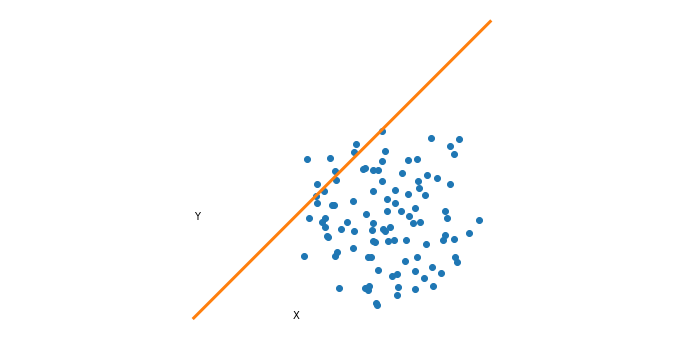

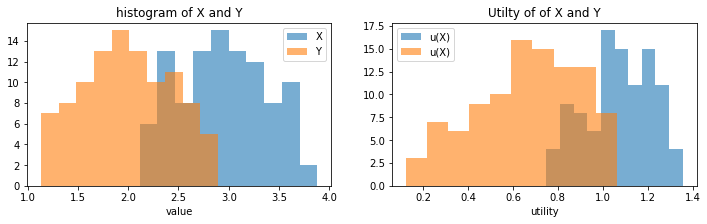

In [149]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.triangular(2, 3, 4, size=n)
y = np.random.triangular(1, 2, 3, size=n)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, 'o')
ax.axis('equal')
ax.plot([1, 4], [1, 4], lw=3)
ax.axis('off')
ax.text(2, 1, "X")
ax.text(1, 2, "Y")

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].hist(x, alpha=0.6, label='X')
ax[0].hist(y, alpha=0.6, label='Y')
ax[0].set_xlabel("value")
ax[0].set_title("histogram of X and Y")
ax[0].legend()

ax[1].hist(np.log(x), alpha=0.6, label='u(X)')
ax[1].hist(np.log(y), alpha=0.6, label='u(X)')
ax[1].set_xlabel("utility")
ax[1].set_title("Utilty of of X and Y")
ax[1].legend();


The plot below is calculated by computing the empirical cumulative distribution, $\hat{F}_X(x)$ and $\hat{F}_Y(x)$ for realizations of $X$ and $Y$. The significance of

$$\hat{F}_X(x) \leq \hat{F}_Y(x)$$

is that for any specified value $x$ on the horizontal axis, the probability of a larger outcome is 

$$1-\hat{F}_X(x) \geq 1-\hat{F}_Y(x)$$

Consider any utility function $u(\cdot)$. 

$$
\begin{align*}
\mathbb{E}_X[u] - \mathbb{E}_X[u] & = \int_{-\infty}^{\infty}u(\xi)[f_X(\xi) - f_Y(\xi)]\,d\xi\\
& = u(\xi) 
\end{align*}
$$

Text(0.5, 1.0, 'Cumulative Distribution')

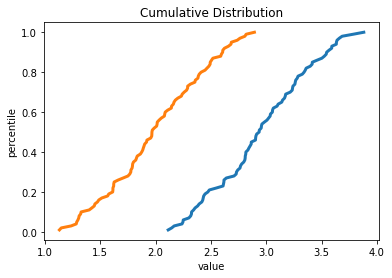

In [151]:
sx = sorted(x)
px = np.arange(1, n+1)/n

sy = sorted(y)
py = np.arange(1, n+1)/n

fig, ax = plt.subplots()
ax.plot(sx, px, sy, py, lw=3)
ax.set_xlabel("value")
ax.set_ylabel("percentile")
ax.set_title("Cumulative Distribution")


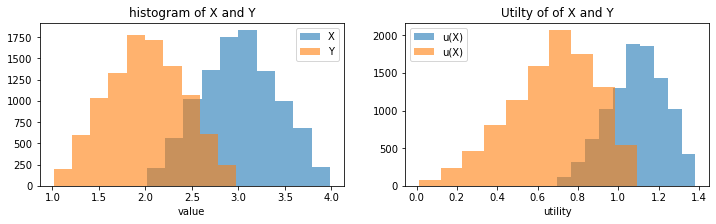

In [106]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.random.triangular(2, 3, 4, size=n)
y = np.random.triangular(1, 2, 3, size=n)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].hist(x, alpha=0.6, label='X')
ax[0].hist(y, alpha=0.6, label='Y')
ax[0].set_xlabel("value")
ax[0].set_title("histogram of X and Y")
ax[0].legend()

ax[1].hist(np.log(x), alpha=0.6, label='u(X)')
ax[1].hist(np.log(y), alpha=0.6, label='u(X)')
ax[1].set_xlabel("utility")
ax[1].set_title("Utilty of of X and Y")
ax[1].legend();

The overlap between these histograms shows there are some realizations of $X$ that are less than some realizations of $Y$. But is that enough to discourage a risk adverse investor from preferring $X$ over $Y$?

Let $f_X(x)$ and $f_Y(y)$ be the probability density functions for $X$ and $Y$, respectively. The cumulative distribution functions are given by

$$
\begin{align*}
F_X(x) & = \int_{-\infty}^x f_X(\xi)\, d\xi \\
F_Y(x) & = \int_{-\infty}^x f_Y(\xi)\, d\xi \\
\end{align*}
$$